In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [39]:
# Initialize an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add edges with optional weights
G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=1)
G.add_edge('B', 'C', weight=7)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=2)
G.add_edge('D', 'E', weight=7)

# Generate positions using the spring layout
pos = nx.spring_layout(G, seed=42)  # seed for reproducibility

# Extract edge coordinates
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Extract node coordinates
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)



In [42]:
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)


In [43]:
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        color=[],  # Placeholder for node colors
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    ),
    text=[node for node in G.nodes()],  # Node labels
    textposition="bottom center"
)

In [44]:
# Calculate degree for each node
degrees = dict(G.degree())
node_trace.marker.color = [degrees[node] for node in G.nodes()]

In [45]:
node_trace.text = [f'{node}<br># of connections: {degrees[node]}' for node in G.nodes()]

In [46]:
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='NetworkX Graph with Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper") ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

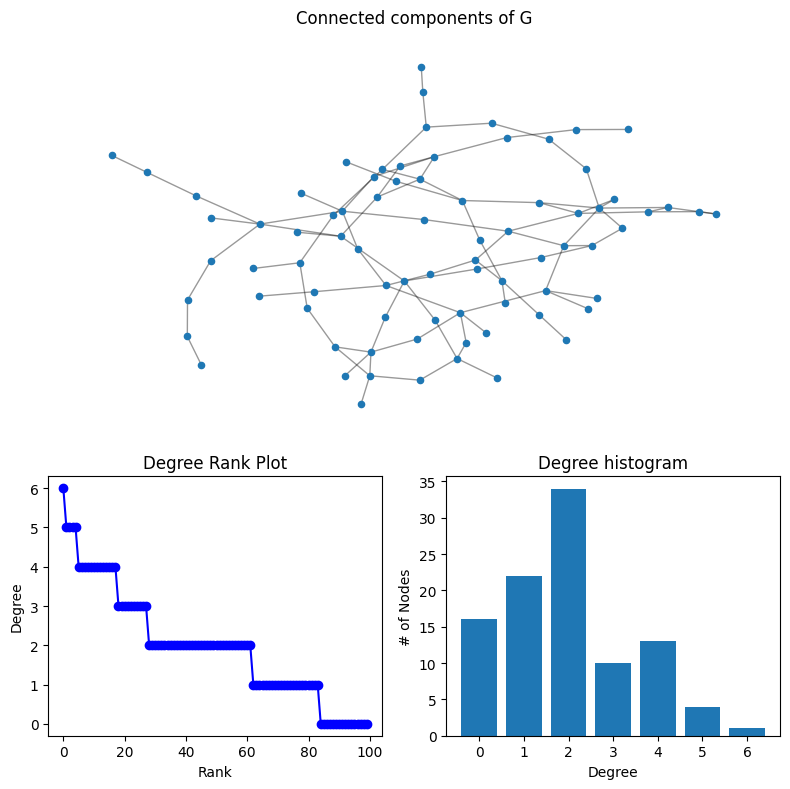

In [50]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [51]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go

# Generate the random graph
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

# Degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

# Create the connected component
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)

# Create a scatter plot for the connected component
edge_x = []
edge_y = []
for edge in Gcc.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # break the line
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)  # break the line

node_x = [pos[node][0] for node in Gcc.nodes()]
node_y = [pos[node][1] for node in Gcc.nodes()]

# Create the plot
fig = go.Figure()

# Add edges
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.4, color='black'), hoverinfo='none'))

# Add nodes
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(size=6, color='blue'), name='Nodes'))

# Update layout for the first subplot
fig.update_layout(title="Connected components of G", showlegend=False)

# Create degree rank plot
rank_plot = go.Figure()
rank_plot.add_trace(go.Scatter(x=list(range(1, len(degree_sequence) + 1)), y=degree_sequence, mode='markers+lines', name='Degree Rank'))
rank_plot.update_layout(title="Degree Rank Plot", xaxis_title="Rank", yaxis_title="Degree")

# Create degree histogram
degree_counts = np.unique(degree_sequence, return_counts=True)
histogram_plot = go.Figure()
histogram_plot.add_trace(go.Bar(x=degree_counts[0], y=degree_counts[1], name='Degree Histogram'))
histogram_plot.update_layout(title="Degree Histogram", xaxis_title="Degree", yaxis_title="# of Nodes")

# Show the figures
fig.show()
rank_plot.show()
histogram_plot.show()


In [60]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate the random graph
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

# Degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Create the connected component
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)

# Create a subplot figure
fig = make_subplots(
    rows=3, cols=1,
    specs=[[{'type': 'scatter'}],
           [{'type': 'scatter'}],
           [{'type': 'bar'}]],
    subplot_titles=("Connected components of G", "Degree Rank Plot", "Degree Histogram")
)

# Add edges to the first subplot
edge_x = []
edge_y = []
for edge in Gcc.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # break the line
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)  # break the line

# Add nodes to the first subplot
node_x = [pos[node][0] for node in Gcc.nodes()]
node_y = [pos[node][1] for node in Gcc.nodes()]

# Add edges and nodes to the figure
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.4, color='black'), hoverinfo='none'), row=1, col=1)
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(size=6, color='blue'), name='Nodes'), row=1, col=1)

# Add degree rank plot to the second subplot
fig.add_trace(go.Scatter(x=list(range(1, len(degree_sequence) + 1)), y=degree_sequence, mode='markers+lines', name='Degree Rank'), row=2, col=1)

# Create degree histogram data
degree_counts = np.unique(degree_sequence, return_counts=True)

# Add degree histogram to the third subplot
fig.add_trace(go.Bar(x=degree_counts[0], y=degree_counts[1], name='Degree Histogram'), row=3, col=1)

# Update layout
fig.update_layout(title_text="Graph Analysis", height=800, width=800)
fig.update_xaxes(title_text="X-axis", row=2, col=1)  # Set common x-axis title for the last plot
fig.update_yaxes(title_text="Y-axis", row=3, col=1)  # Set common y-axis title for the last plot

# Show the figure
fig.show()


In [61]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate the random graph
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

# Degree sequence
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

# Create the connected component
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)

# Create a subplot figure
fig = make_subplots(
    rows=3, cols=1,
    specs=[[{'type': 'scatter'}],
           [{'type': 'scatter'}],
           [{'type': 'bar'}]],
    subplot_titles=("Connected components of G", "Degree Rank Plot", "Degree Histogram")
)

# Add edges to the first subplot
edge_x = []
edge_y = []
for edge in Gcc.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # break the line
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)  # break the line

# Add nodes to the first subplot
node_x = [pos[node][0] for node in Gcc.nodes()]
node_y = [pos[node][1] for node in Gcc.nodes()]

# Add edges and nodes to the figure
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.4, color='black'), hoverinfo='none'), row=1, col=1)
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers', marker=dict(size=6, color='blue'), name='Nodes'), row=1, col=1)

# Add degree rank plot to the second subplot
fig.add_trace(go.Scatter(x=list(range(1, len(degree_sequence) + 1)), y=degree_sequence, mode='markers+lines', name='Degree Rank'), row=2, col=1)

# Create degree histogram data
degree_counts = np.unique(degree_sequence, return_counts=True)

# Add degree histogram to the third subplot
fig.add_trace(go.Bar(x=degree_counts[0], y=degree_counts[1], name='Degree Histogram'), row=3, col=1)

# Update layout for the figure
fig.update_layout(title_text="Graph Analysis", height=900, width=800)

# Set aspect ratio for the first two subplots
fig.update_yaxes(scaleanchor="x", row=1, col=1)  # Anchor y-axis to x-axis for first subplot
fig.update_yaxes(scaleanchor="x", row=2, col=1)  # Anchor y-axis to x-axis for second subplot

# Magnify the first subplot by adjusting the x and y axis ranges
x_range = [-1.5, 1.5]  # Adjust this range as needed for magnification
y_range = [-1.5, 1.5]  # Adjust this range as needed for magnification
fig.update_xaxes(range=x_range, row=1, col=1)  # Set x-axis range for the first subplot
fig.update_yaxes(range=y_range, row=1, col=1)  # Set y-axis range for the first subplot

# Update axes titles
fig.update_xaxes(title_text="X-axis", row=2, col=1)  # X-axis title for degree rank plot
fig.update_yaxes(title_text="Y-axis", row=3, col=1)  # Y-axis title for degree histogram

# Show the figure
fig.show()